This notebook finds the pixels within a range of right ascensions and declinations and finds their intensity as a function of frequency. All data is taken from the 2008 paper "A model of diffuse Galactic radio emission from 10 MHz to 100 GHz" by de Oliveira-Costa et al.

In [1]:
import pysm
from pysm.nominal import models
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib notebook
from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import get_icrs_coordinates
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time
from astropy.coordinates import get_constellation
#I'm not sure this cell is really necessary

In [4]:
nside = 512 
sky_config = {
    'synchrotron' : models('s1', nside), 
    'dust' : models('d1', nside), 
    'freefree' : models('f1', nside), 
    'cmb' : models('c1', nside), 
    'ame' : models('a1', nside)
}
sky = pysm.Sky(sky_config)
#sets the sky and the resolution
#you have to run this cell twice in a row

In [5]:
nu = np.linspace(0.05, 0.25, 30)
total_signal = sky.signal()(nu)
npix = hp.nside2npix(nside)

In [6]:
points = []
for q in range(15):
    vec = hp.ang2vec(np.random.uniform(0, np.pi), np.random.uniform(0, 2 * np.pi))
    #print(vec)
    result = vec.flatten() 
    ipix_disc = hp.query_disc(nside = 64, vec = result, radius = np.radians(5))
    m = np.arange(npix)
    m[ipix_disc] = m.max()
    points.append(ipix_disc)
#puts out random pixels on the sky

In [7]:
intensity = []
points = []
intensity1 = []
for q in range(15):
    vec = hp.ang2vec(np.random.uniform(0, np.pi), np.random.uniform(0, 2 * np.pi))
    result = vec.flatten() 
    ipix_disc = hp.query_disc(nside = 64, vec = result, radius = np.radians(5))
    m = np.arange(npix)
    m[ipix_disc] = m.max()
    points.append(ipix_disc)
for a in range(30):
    intensity.append(total_signal[a, 0, ipix_disc])
reshape = np.reshape(intensity, (-1, len(ipix_disc)))
for i in range(len(ipix_disc)):
    for m in range(len(nu)):
        intensity1.append(reshape[m][i])
r_intensity = np.reshape(intensity1, (-1, 30))
for b in range(30):
    print(plt.figtext(nu, r_intensity[b], s = ''))
#takes random points and puts out the intensity as a function of frequency at those points

Text([0.05       0.05689655 0.0637931  0.07068966 0.07758621 0.08448276
 0.09137931 0.09827586 0.10517241 0.11206897 0.11896552 0.12586207
 0.13275862 0.13965517 0.14655172 0.15344828 0.16034483 0.16724138
 0.17413793 0.18103448 0.18793103 0.19482759 0.20172414 0.20862069
 0.21551724 0.22241379 0.22931034 0.2362069  0.24310345 0.25      ], [5.99879778e+09 4.06909107e+09 2.88584464e+09 2.12036647e+09
 1.60341503e+09 1.24178468e+09 9.81257612e+08 7.88829914e+08
 6.43626379e+08 5.32003279e+08 4.44786670e+08 3.75653172e+08
 3.20147876e+08 2.75070669e+08 2.38082503e+08 2.07446768e+08
 1.81855760e+08 1.60312008e+08 1.42045689e+08 1.26456245e+08
 1.13070503e+08 1.01512232e+08 9.14797398e+07 8.27291937e+07
 7.50620776e+07 6.83156615e+07 6.23556945e+07 5.70707550e+07
 5.23678462e+07 4.81689369e+07], '')
Text([0.05       0.05689655 0.0637931  0.07068966 0.07758621 0.08448276
 0.09137931 0.09827586 0.10517241 0.11206897 0.11896552 0.12586207
 0.13275862 0.13965517 0.14655172 0.15344828 0.16034483

<Figure size 432x288 with 0 Axes>

## To plot the values

In [8]:
def find_pixel_numbers(nside, min_ra, max_ra, min_dec, max_dec):
    npix = hp.nside2npix(nside)
    pixel = []
    for i in range(npix):
        c = hp.pix2ang(nside, i, lonlat = True)
        if min_dec <= c[1] <= max_dec and min_ra <= c[0] <= max_ra:
            pixel.append(i)
    return(pixel)
#gives the pixel numbers in between certain right ascensions and declinations for whatever resolution you want
#right ascension and declination in degrees ra:(0, 360), dec:(-90, 90)

In [9]:
freqs = np.array([0.010, 0.022, 0.045, 0.408, 1.42, 2.326])

<IPython.core.display.Javascript object>


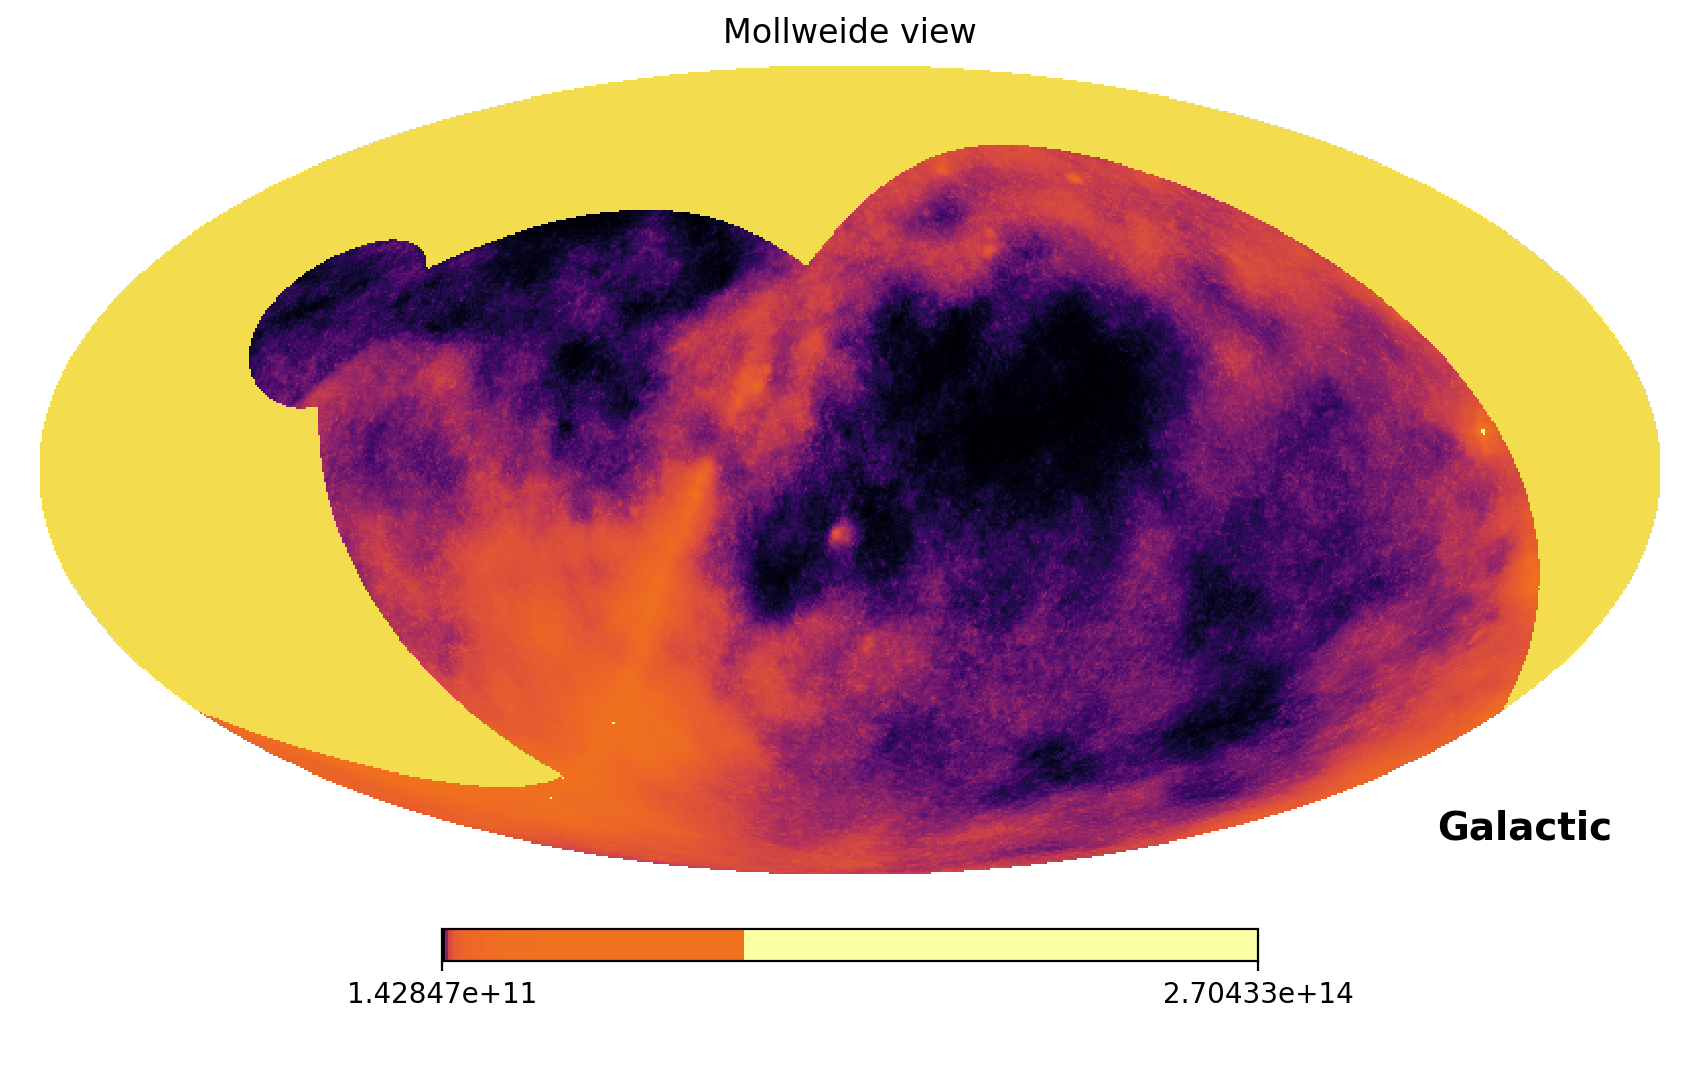

In [12]:
%matplotlib notebook
first = find_pixel_numbers(512, 0, 240, 1, 74) #0.010 GHz
signal = sky.signal()(freqs)
signal[0, 0, first] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')
#the pixels given with the right ascensions and declinations are in yellow. I had to change from celestial? to galactic

<IPython.core.display.Javascript object>


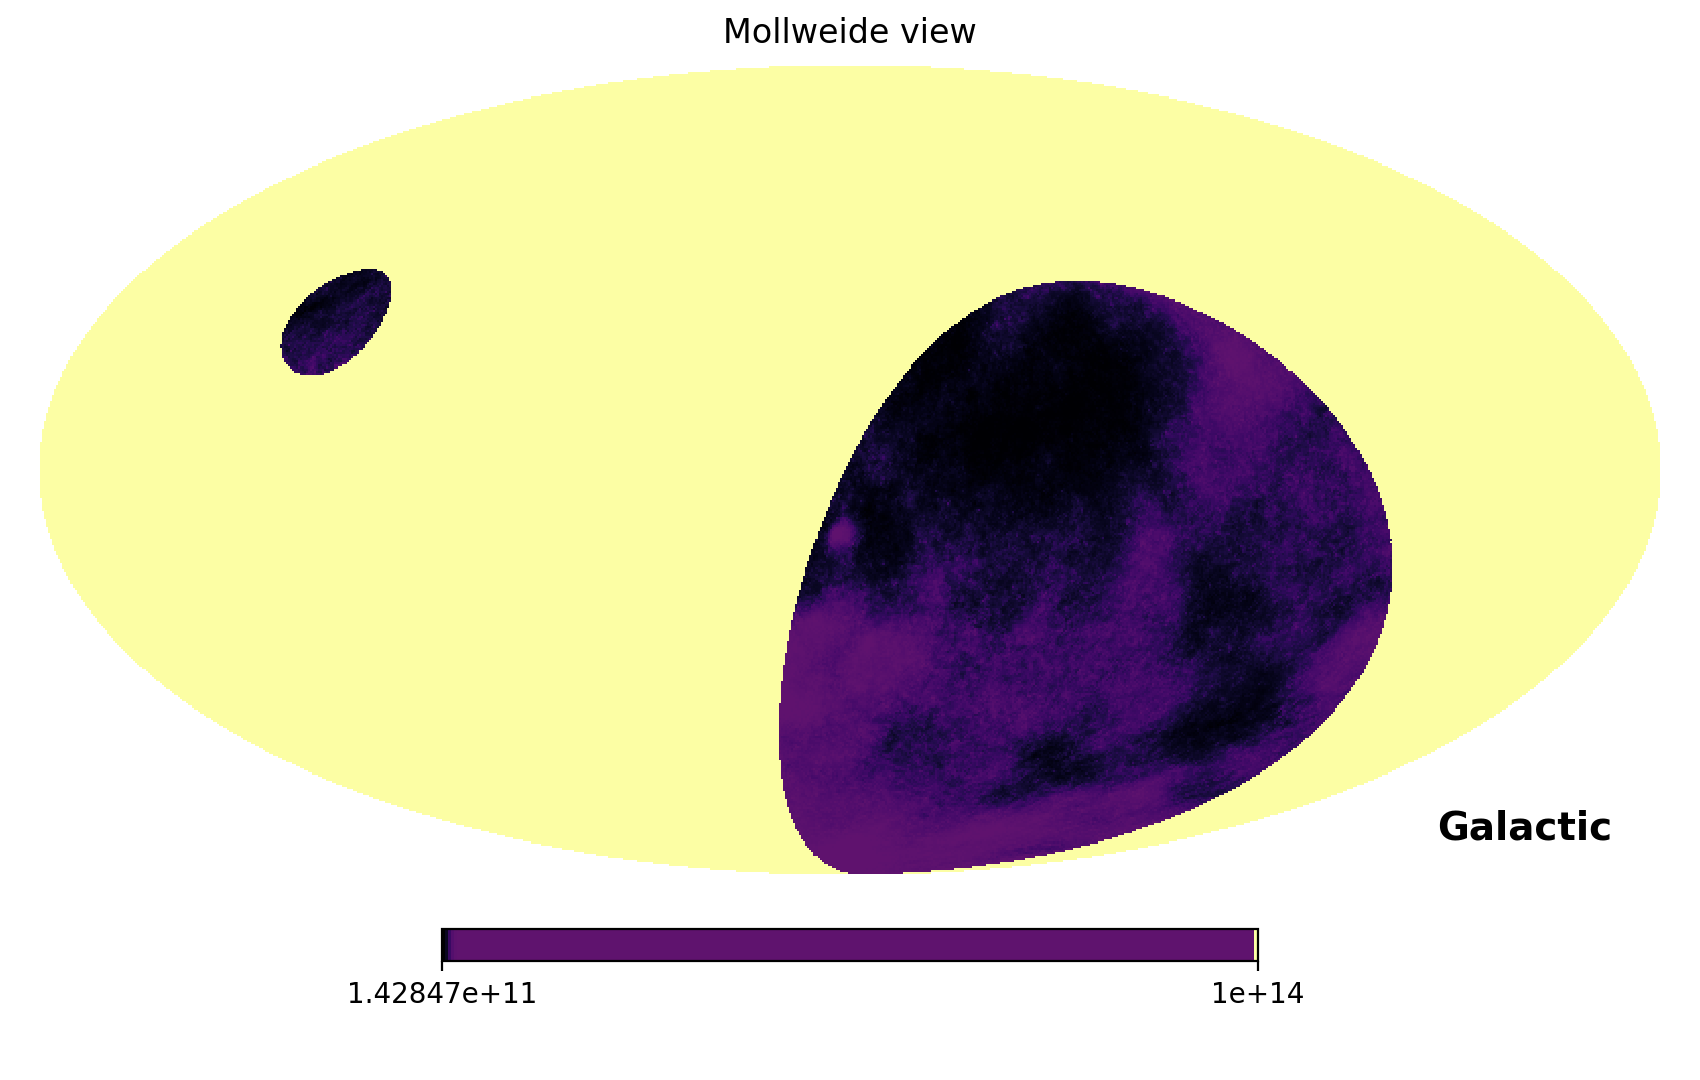

In [11]:
%matplotlib notebook
second = find_pixel_numbers(512, 0, 360, -28, 80) #0.022GHz
signal = sky.signal()(freqs)
signal[0, 0, second] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')

<IPython.core.display.Javascript object>


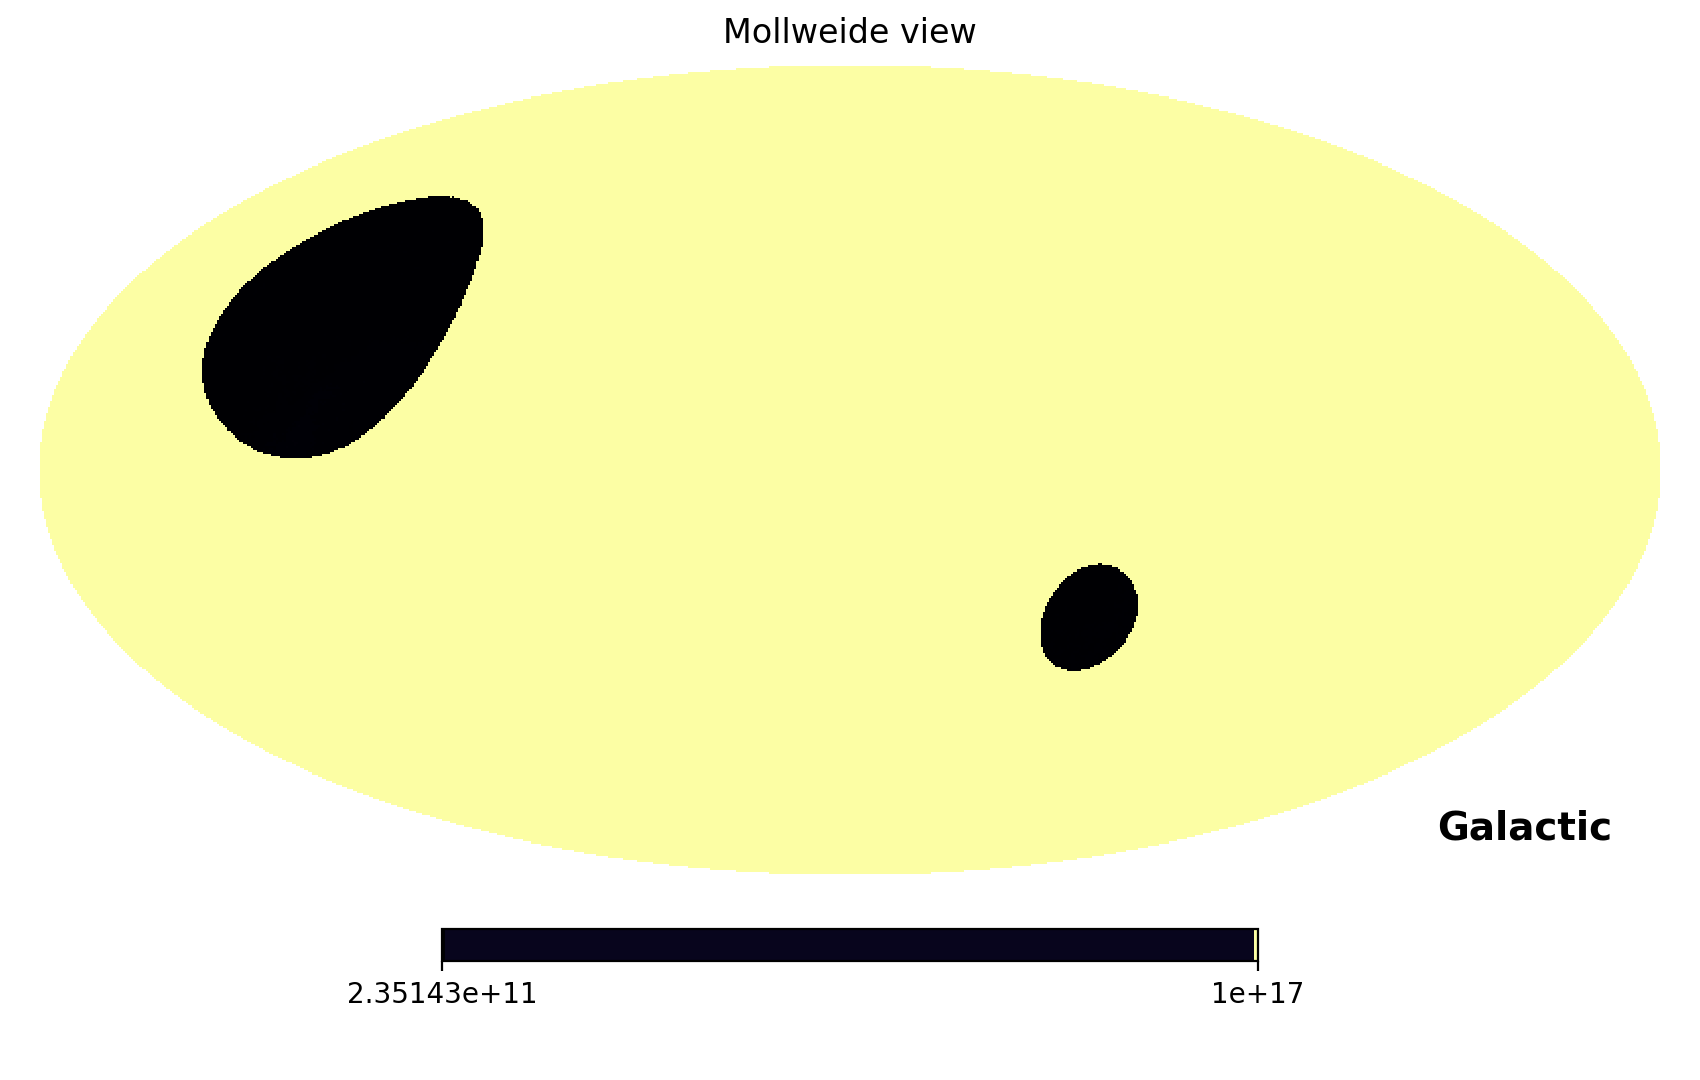

In [13]:
third = find_pixel_numbers(512, 0, 360, -80, 65) #0.045 GHz
signal = sky.signal()(freqs)
signal[0, 0, third] = 100000000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')

<IPython.core.display.Javascript object>


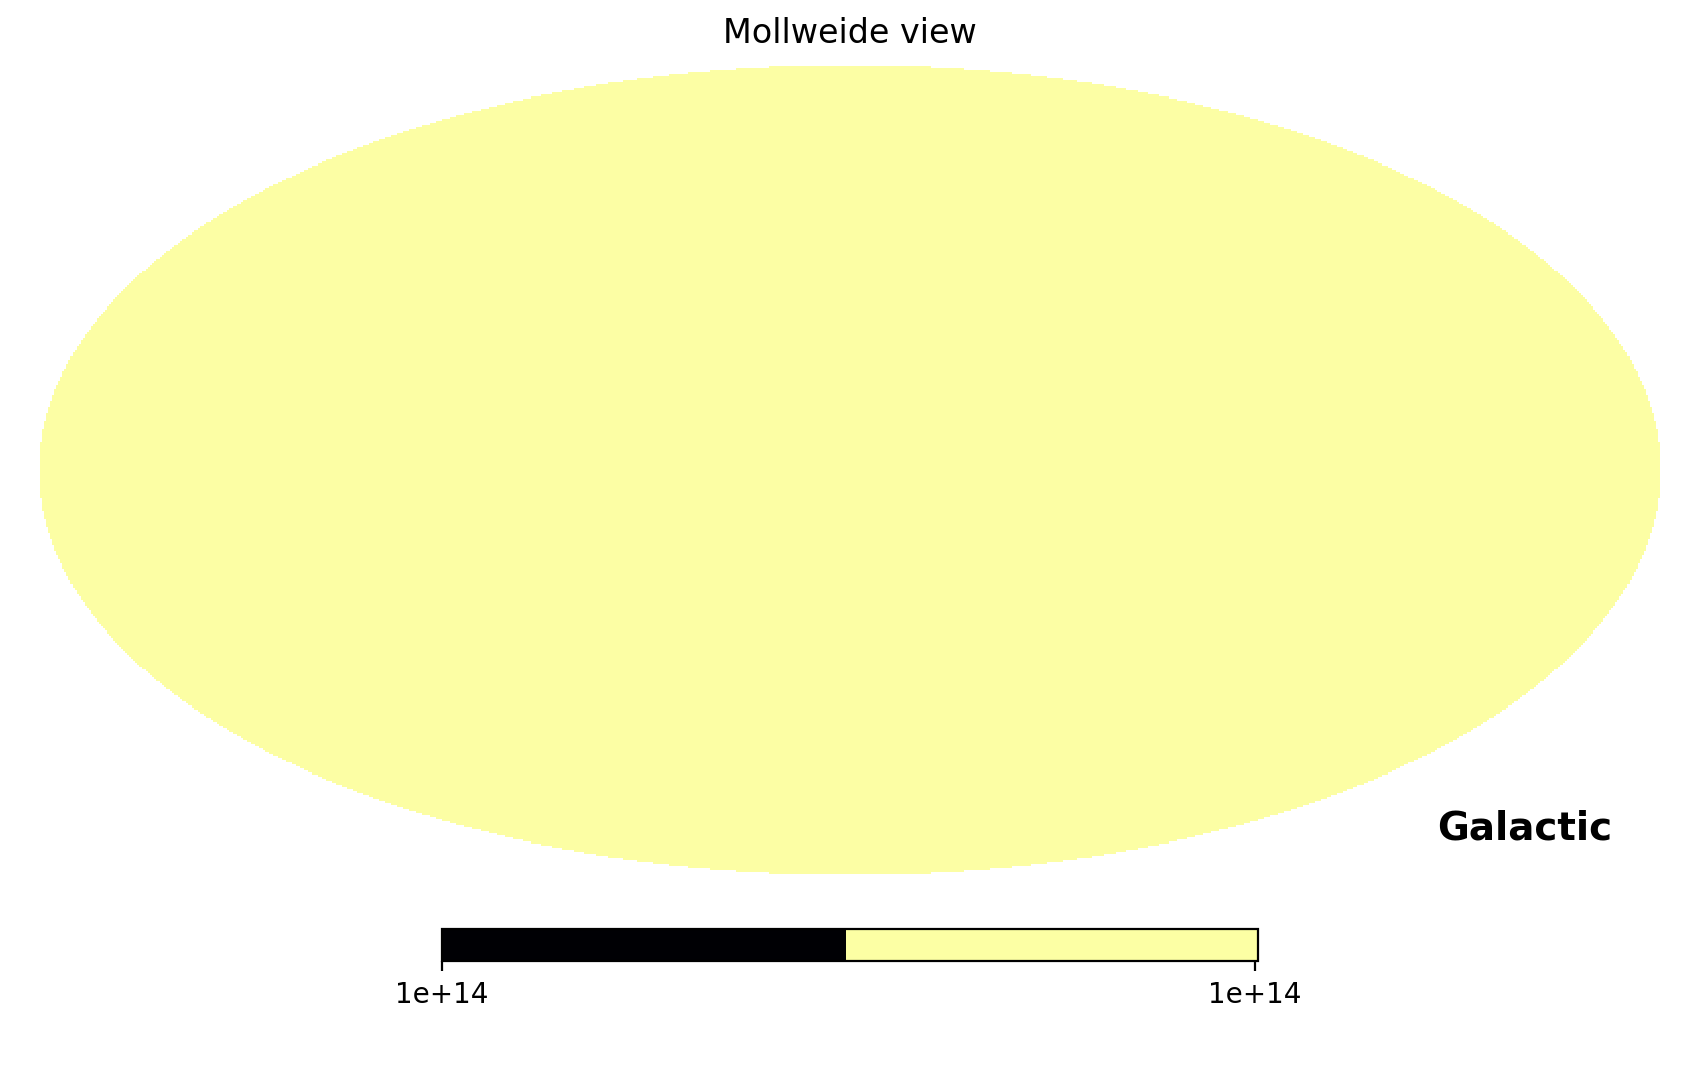

In [14]:
fourth = find_pixel_numbers(512, 0, 360, -90, 90) #0.408 GHz
signal = sky.signal()(freqs)
signal[0, 0, fourth] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')
#this one and the next one cover the whole sky

<IPython.core.display.Javascript object>


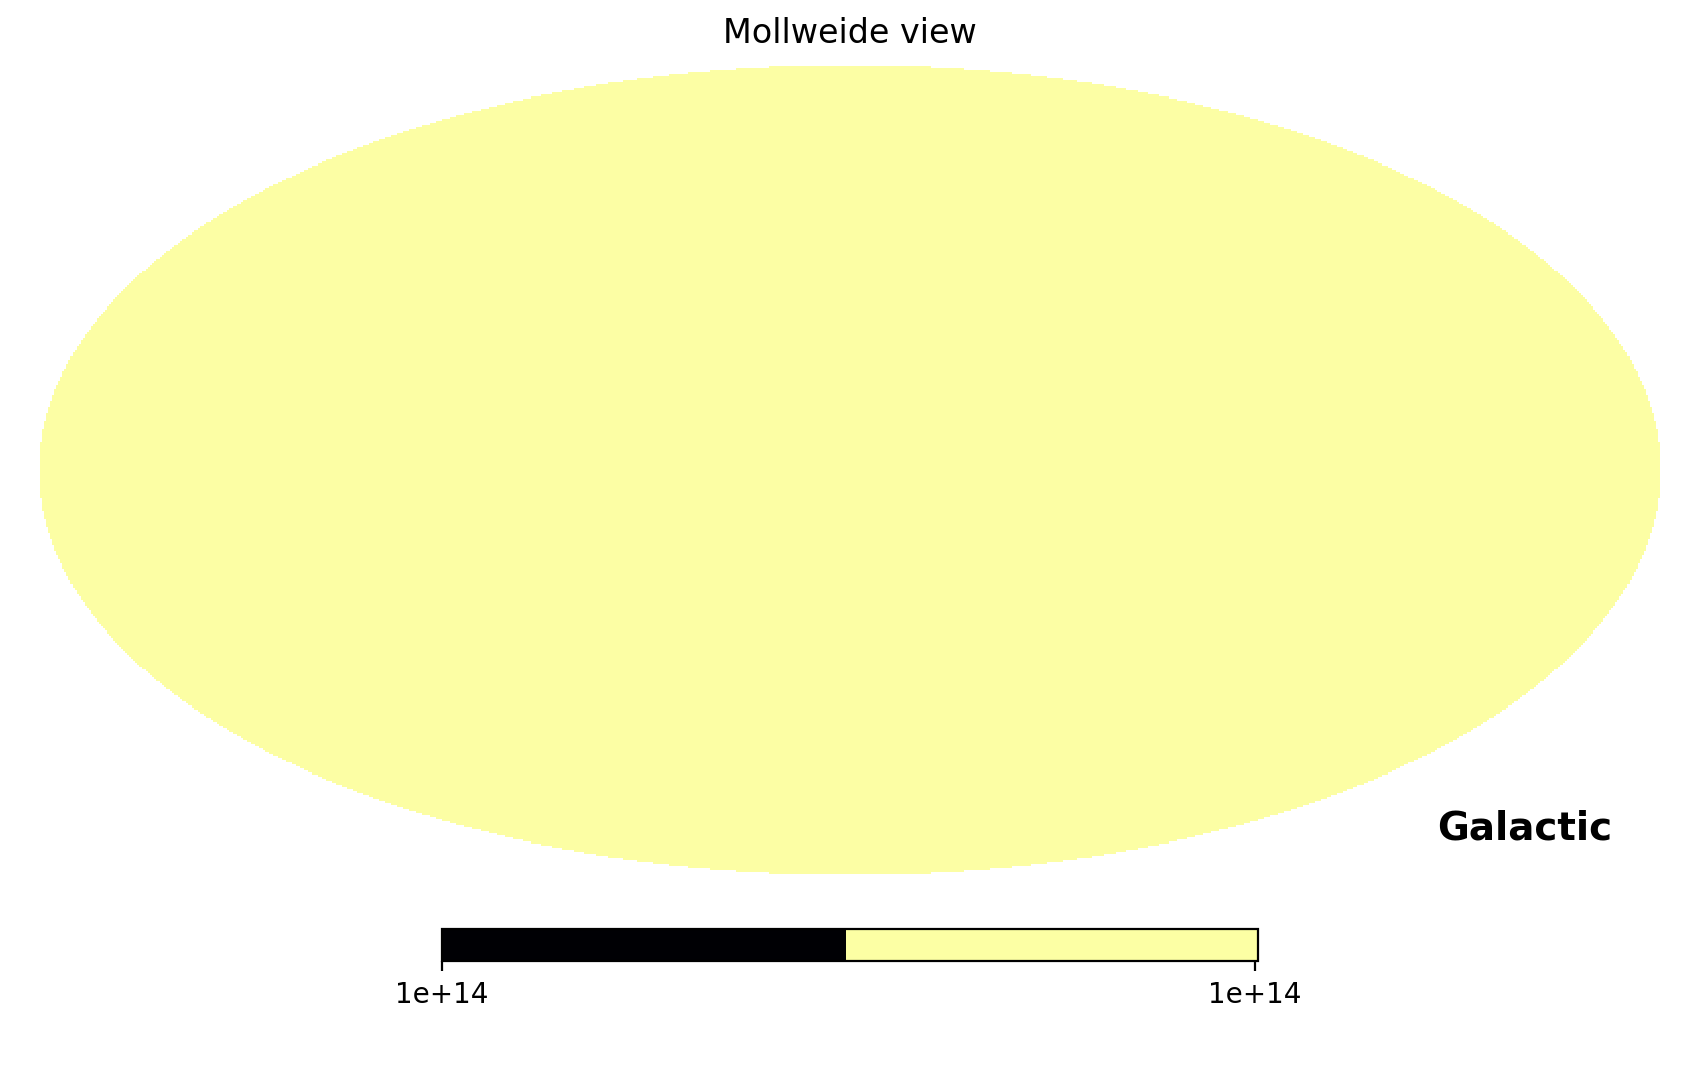

In [15]:
fifth = find_pixel_numbers(512, 0, 360, -90, 90) #1.42 GHz
signal = sky.signal()(freqs)
signal[0, 0, fifth] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')

<IPython.core.display.Javascript object>


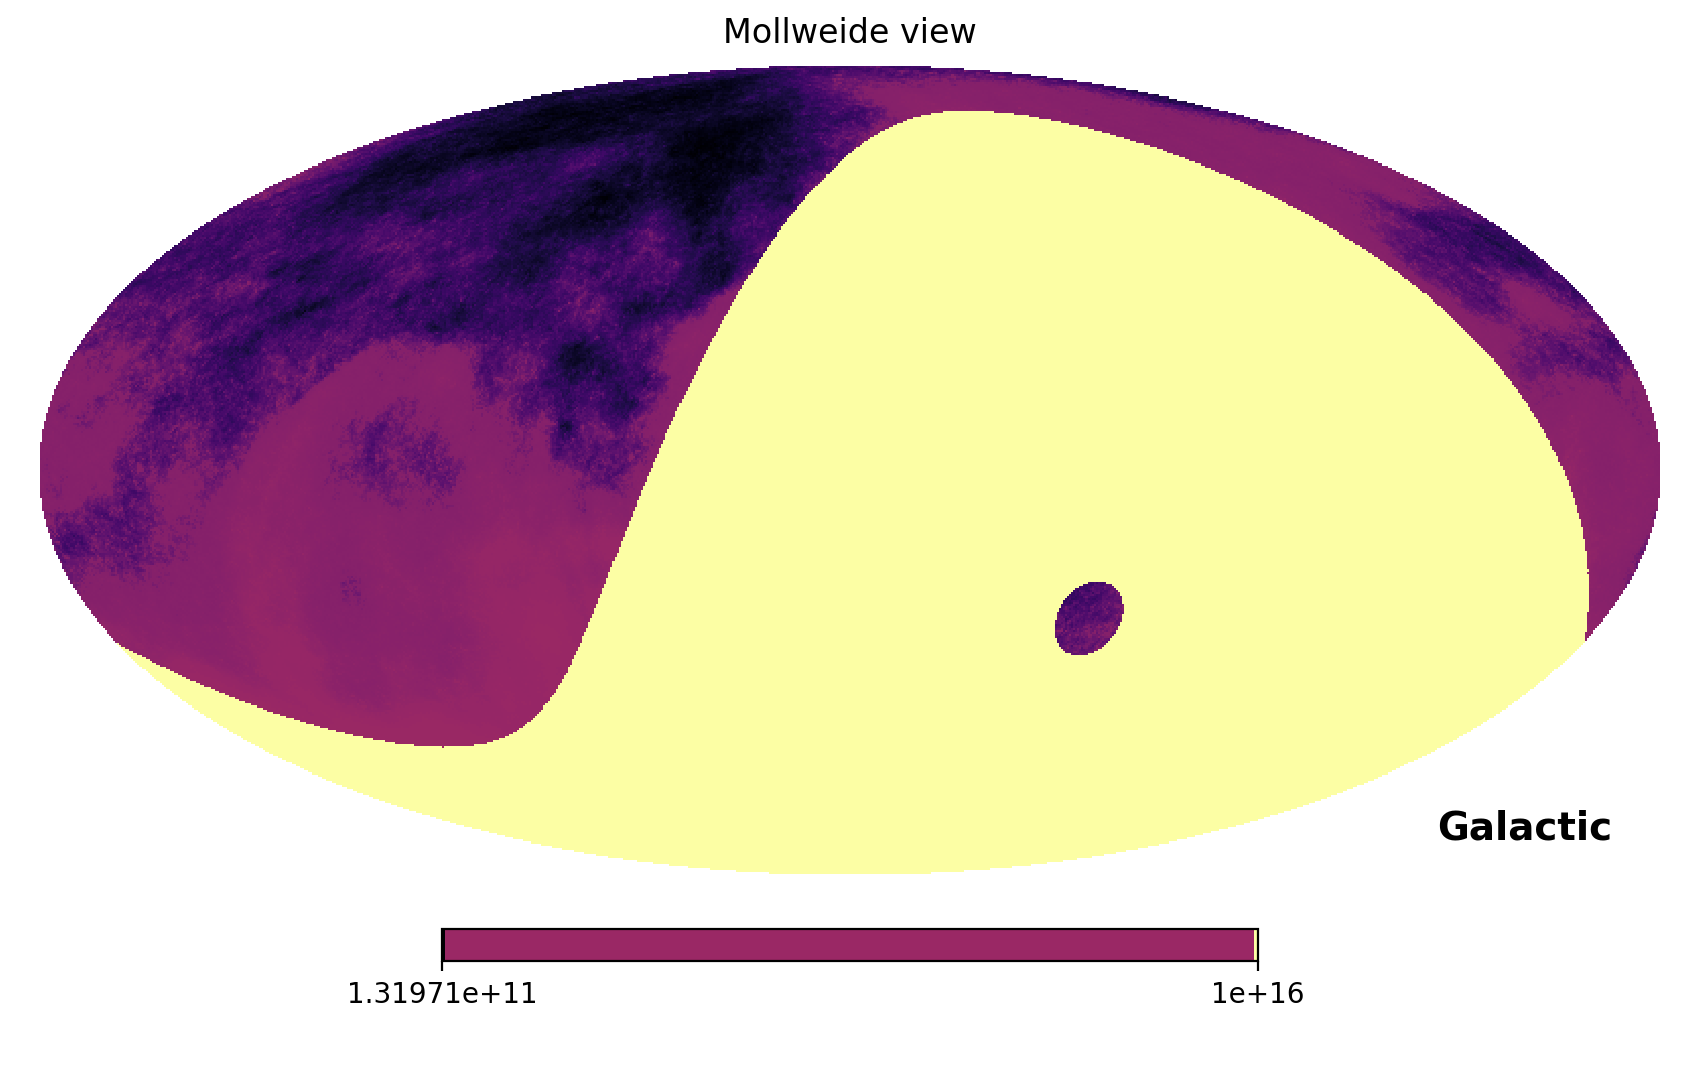

In [16]:
sixth = find_pixel_numbers(512, 0, 360, -83, 10) #2.326 GHz
signal = sky.signal()(freqs)
signal[0, 0, sixth] = 10000000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')

In [17]:
#finds where the pixels on all of the maps intersect
all1 = np.intersect1d(first, second)
all2 = np.intersect1d(all1, third)
all3 = np.intersect1d(all2, fourth)
all4 = np.intersect1d(all3, fifth)
pix_all = np.intersect1d(all4, sixth)

In [18]:
print(len(all1))
print(len(all2))
print(len(all3))
print(len(all4))
len(pix_all)

989627
931944
931944
931944


163860

<IPython.core.display.Javascript object>


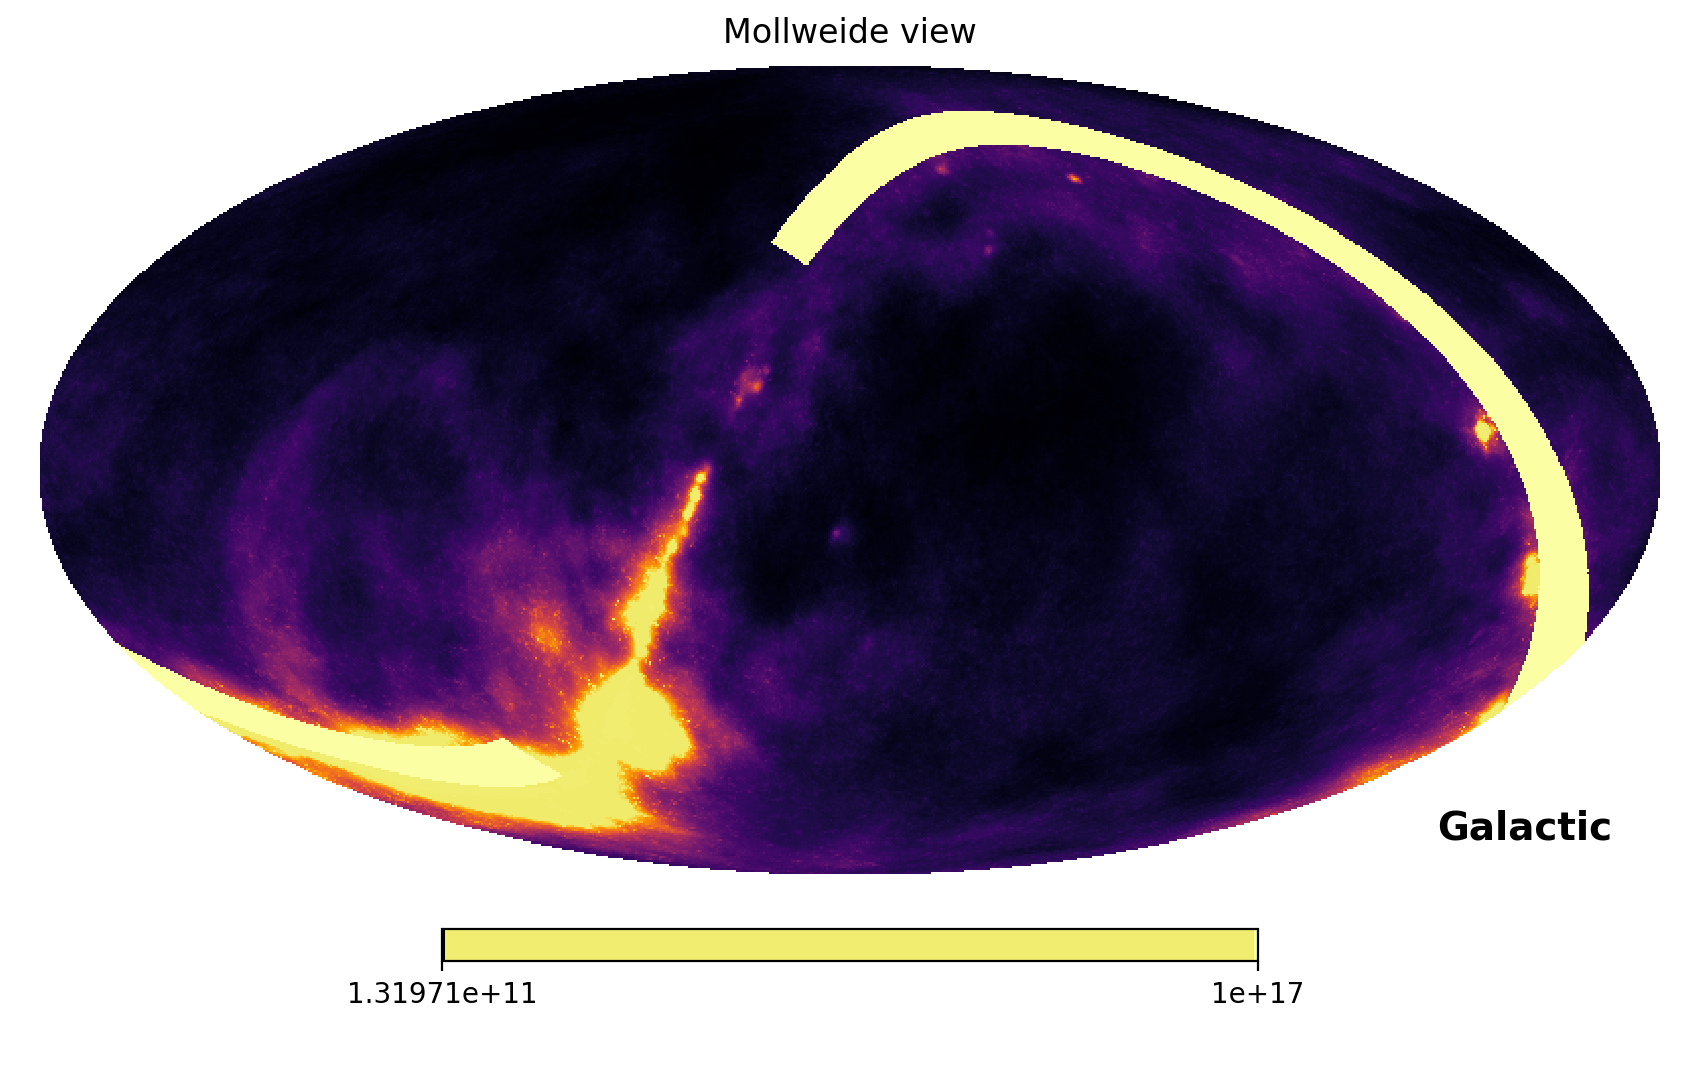

In [19]:
#plots the pixels on all six of the maps in yellow
signal = sky.signal()(freqs)
signal[0, 0, pix_all] = 100000000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', coord = 'CG')

In [20]:
def sky_read(pix_nums, full_sky_maps, frequencies):
    intensity = []
    new_intensity = []
    r_intensity = []
    intensity1 = []
    for a in range(len(frequencies)):
        intensity.append(full_sky_maps[a, 0, pix_nums])
    new_intensity.append(np.reshape(intensity, (-1, len(pix_nums))))
    for i in range(len(pix_nums)):
        for m in range(len(frequencies)):
            intensity1.append(new_intensity[0][m][i])
    r_intensity.append(np.reshape(intensity1, (-1, len(frequencies))))
    return(r_intensity)

In [21]:
#this is the data for these pixels
m = sky_read(pix_all, sky.signal()(freqs), freqs)
data_all = m[0]

In [22]:
#this adds noise to the data
data = []
data1 = []
for i in range(len(pix_all)):
    for m in range(len(freqs)):
        data.append((data_all[i][m] + np.random.normal(loc = 500000000000, scale = 500000000000)))
data1.append(np.reshape(data, (-1, len(freqs))))
noisy_data = data1[0]

In [23]:
np.savez('noisy_data.npz', noisy_data)

<IPython.core.display.Javascript object>


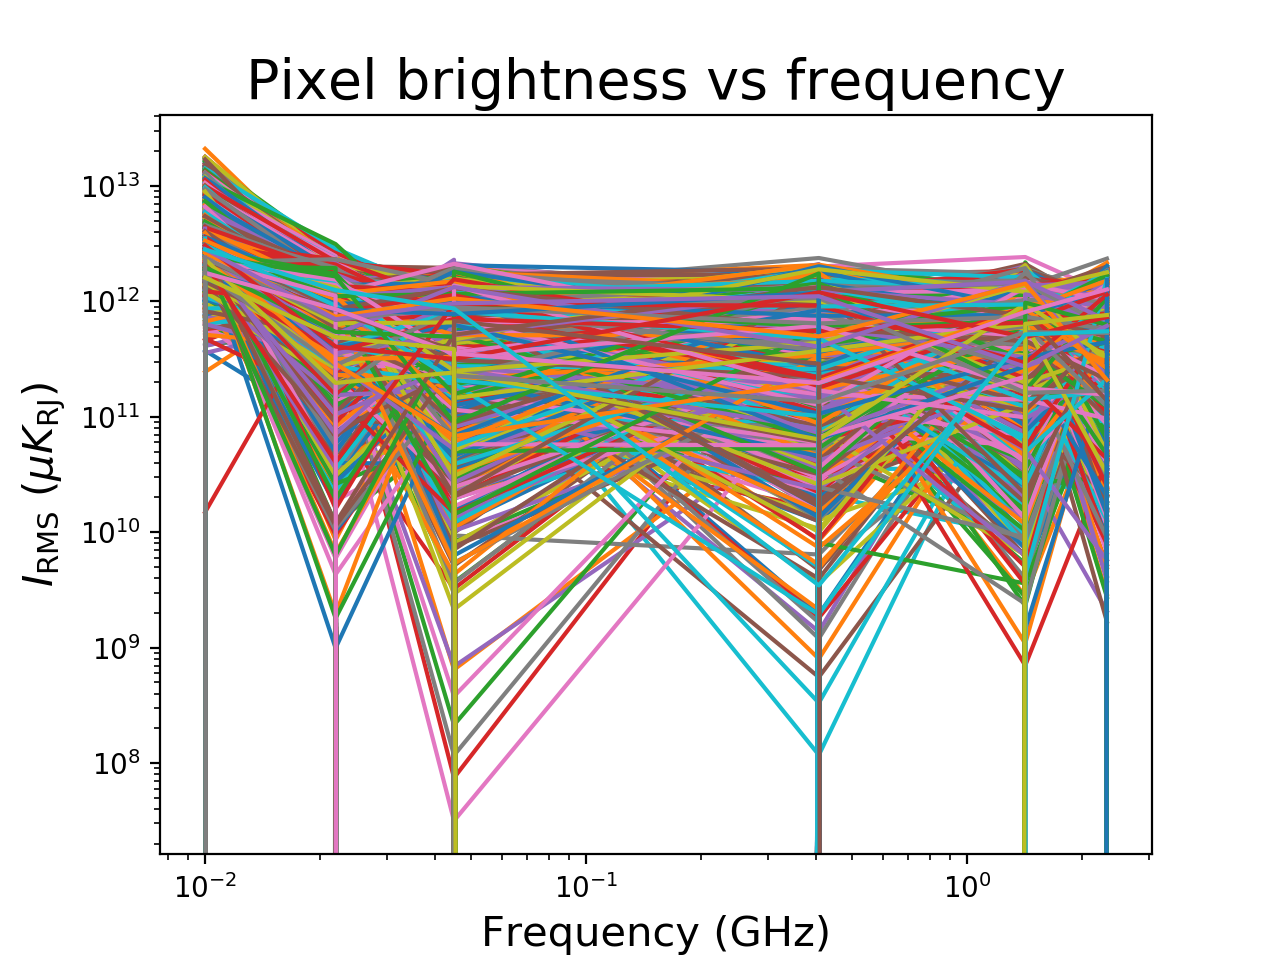

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [24]:
#the graph for the first 500 pixels of the noisy data
plt.figure()
for i in range(5000):
    plt.loglog(freqs, noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Pixel brightness vs frequency', fontsize = 20)

Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


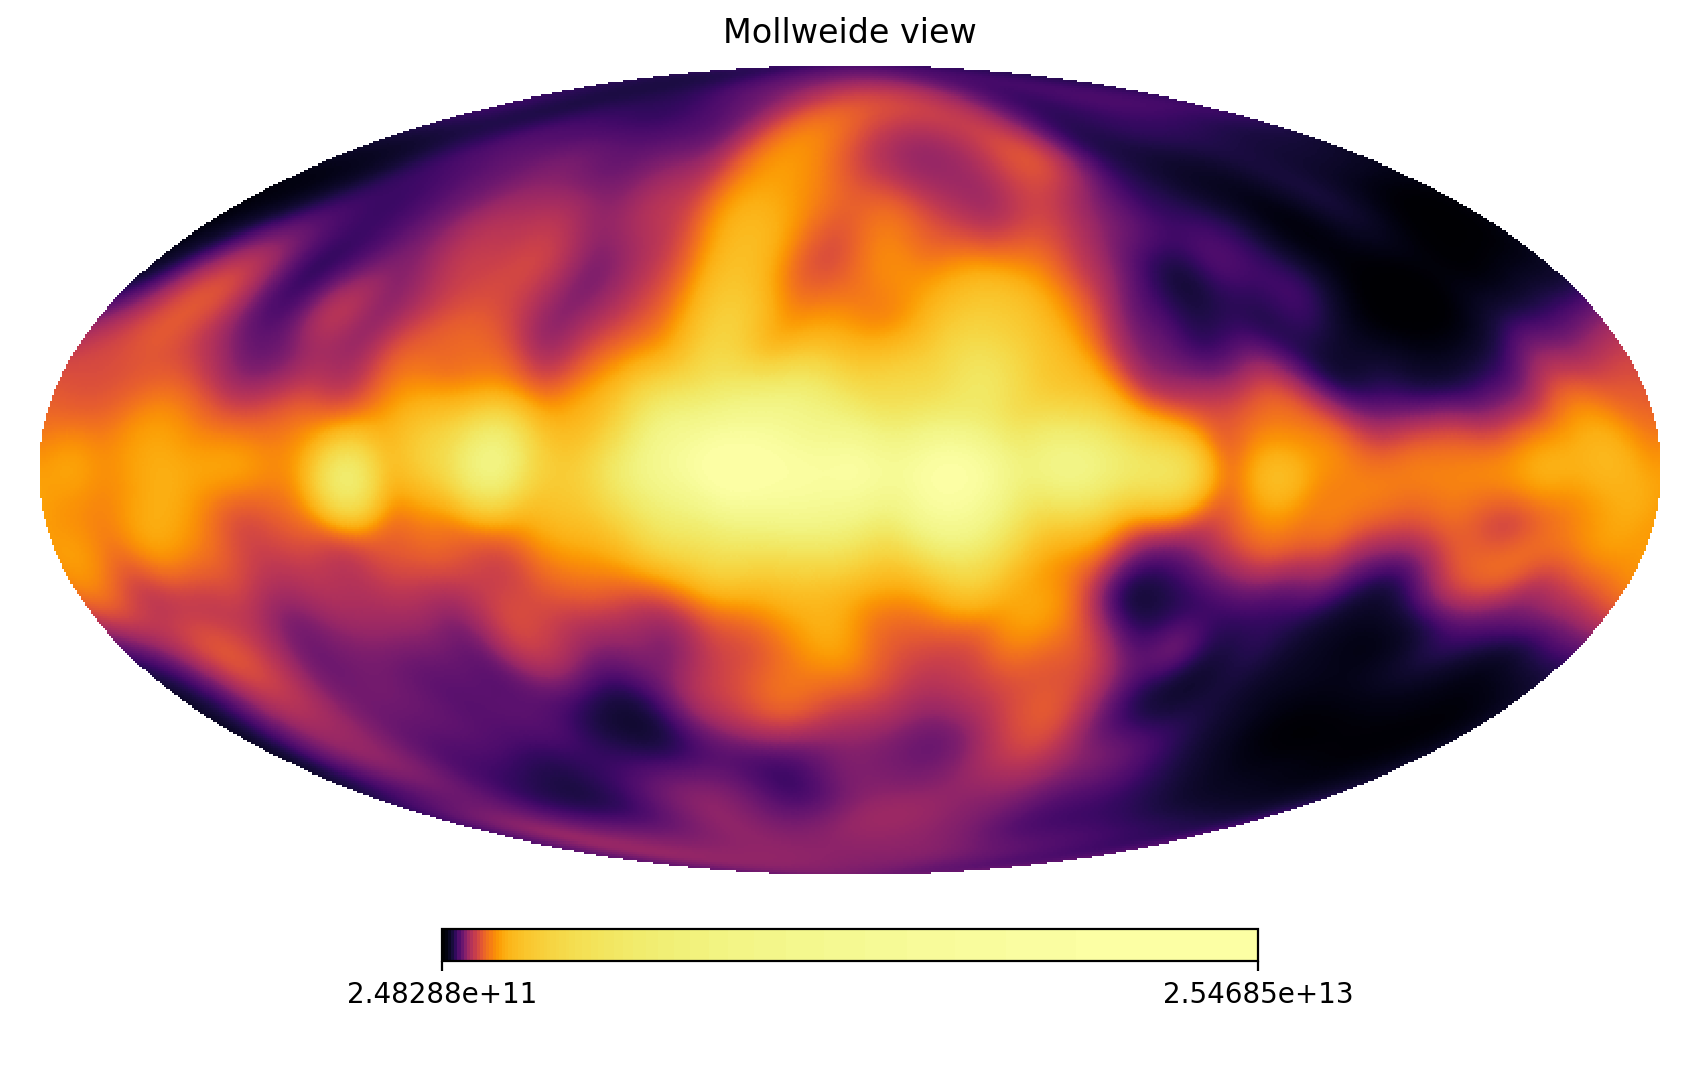

In [26]:
signal = sky.signal()(freqs)
map_out = hp.sphtfunc.smoothing(signal[0, 0, :], fwhm = 0.17, iter = 1)
hp.mollview(map_out, nest = False, cmap = 'inferno', norm = 'hist')
#maps the smoothed data

In [27]:
#this is the data smoothed by the same amount for all of it
map_out = []
for i in range(6):
    map_out.append(hp.sphtfunc.smoothing(signal[i, 0, :], fwhm = 0.17, iter = 1))

Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [28]:
#this is the data smoothed by random amounts for each point and then reshaped to a 2d array with shape (163860, 6)
#while still maintaining overall integrity of the data
#You want it to have this shape in order to plot these intensities vs the frequencies, which have length 6
data4 = []
data5 = []
data6 = []
data7 = []
for i in range(6):
    data4.append(hp.sphtfunc.smoothing(signal[i, 0, :], fwhm = np.random.normal(loc = 0.5, scale = 0.5), iter = 1))
for i in range(len(freqs)):
    data7.append(data4[i][pix_all])
for i in range(len(pix_all)):
    for m in range(len(freqs)):
        data5.append((data7[m][i]))
data6.append(np.reshape(data5, (-1, len(freqs))))
blurry_data = data6[0]

Sigma is 1835.699945 arcmin (0.533983 rad) 
-> fwhm is 4322.743028 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 2269.451854 arcmin (0.660157 rad) 
-> fwhm is 5344.150716 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 906.093475 arcmin (0.263572 rad) 
-> fwhm is 2133.687078 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 196.362876 arcmin (0.057120 rad) 
-> fwhm is 462.399237 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 2647.762642 arcmin (0.770203 rad) 
-> fwhm is 6235.004544 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 1988.406257 arcmin (0.578404 rad) 
-> fwhm is 4682.338911 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [29]:
np.savez('blurry_data.npz', blurry_data)

<IPython.core.display.Javascript object>


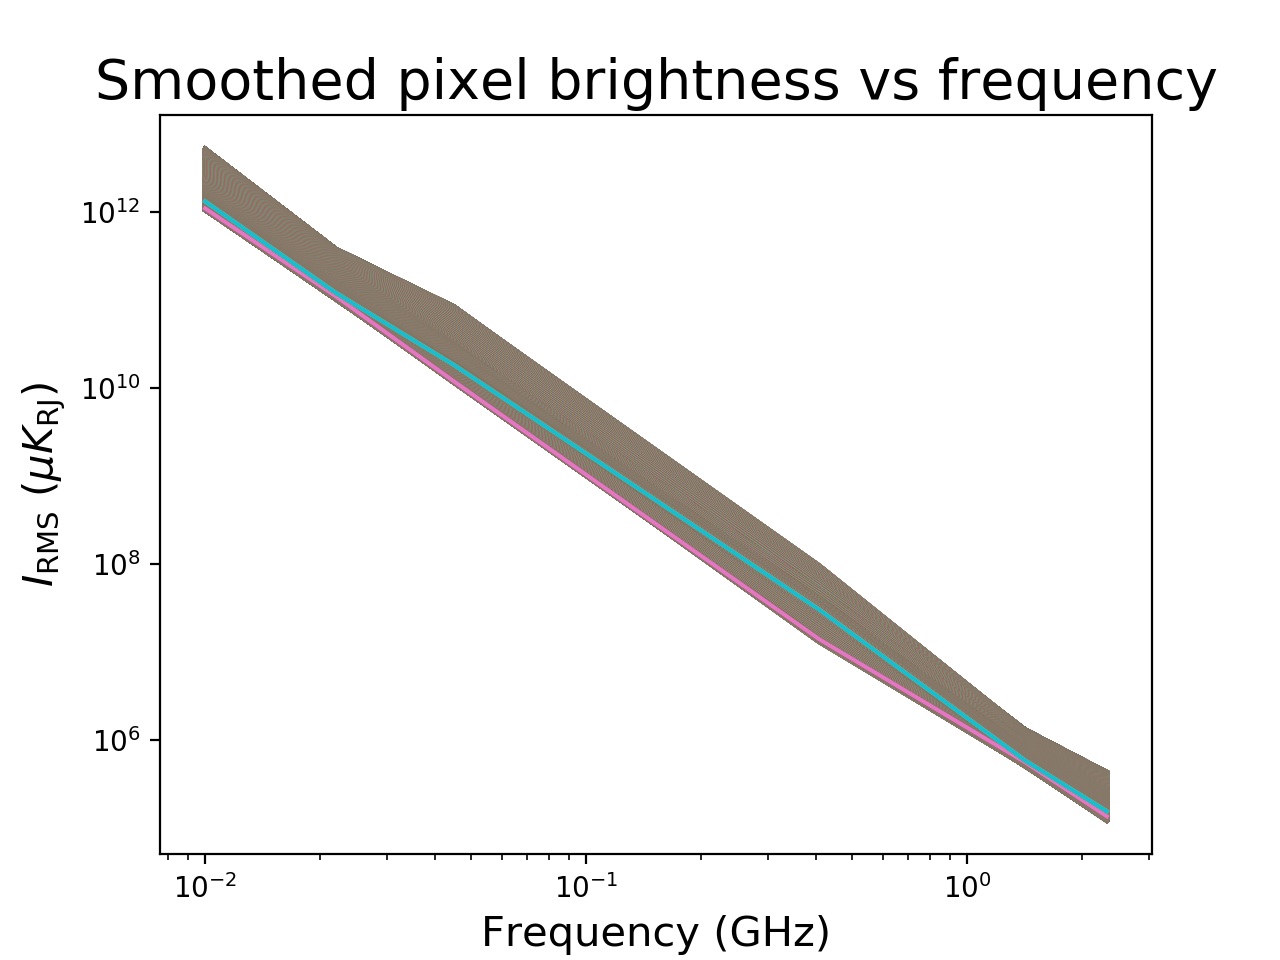

Text(0.5, 1.0, 'Smoothed pixel brightness vs frequency')

In [30]:
#here's the first 5000 pixels of the blurry data
plt.figure()
for i in range(5000):
    plt.loglog(freqs, blurry_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Smoothed pixel brightness vs frequency', fontsize = 20)

In [31]:
#this takes the blurry data, and adds random values in to each of the points to simulate noise
data2 = []
data3 = []
for i in range(len(pix_all)):
    for m in range(len(freqs)):
        data2.append((blurry_data[i][m] + np.random.normal(loc = 500000000000, scale = 500000000000)))
data3.append(np.reshape(data2, (-1, len(freqs))))
blurry_noisy_data = data3[0]

In [32]:
np.savez('blurry_noisy_data.npz', blurry_noisy_data)

<IPython.core.display.Javascript object>


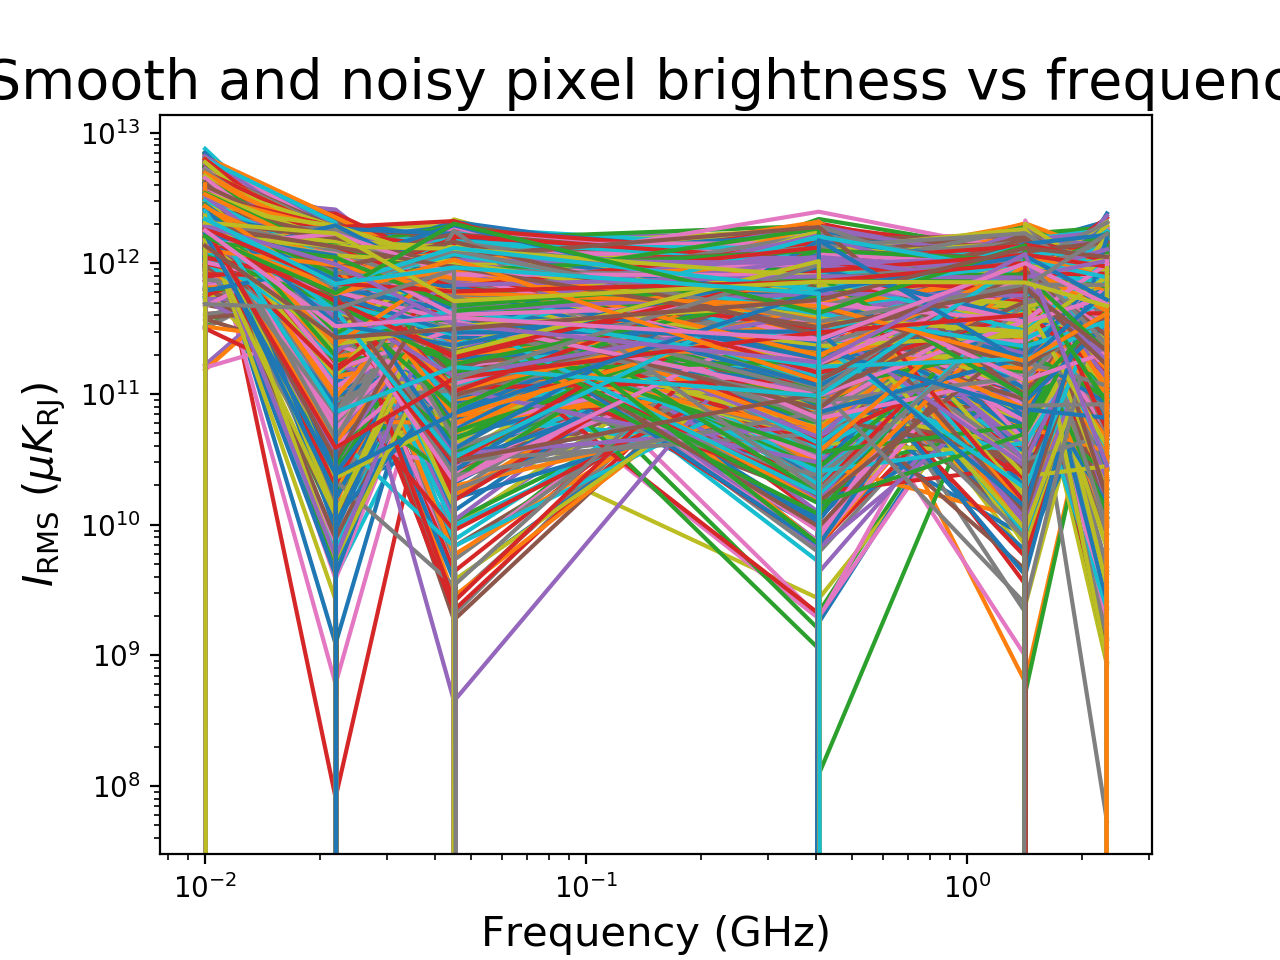

Text(0.5, 1.0, 'Smooth and noisy pixel brightness vs frequency')

In [33]:
plt.figure()
for i in range(5000):
    plt.loglog(freqs, blurry_noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Smooth and noisy pixel brightness vs frequency', fontsize = 20)

Here is just the graph of the first 500 pixels on the map

In [34]:
nu = np.linspace(0.1, 50, 30)
total_signal = sky.signal()(nu)
pix = np.arange(1, 501)
brightness = []
new_brightness = []

for i in range(30):
    brightness.append((total_signal[i, 0, pix]))

for i in range(len(pix)):
    for m in range(30):
        new_brightness.append(brightness[m][i])

new_new_brightness = np.reshape(new_brightness, (-1, 30))

<IPython.core.display.Javascript object>


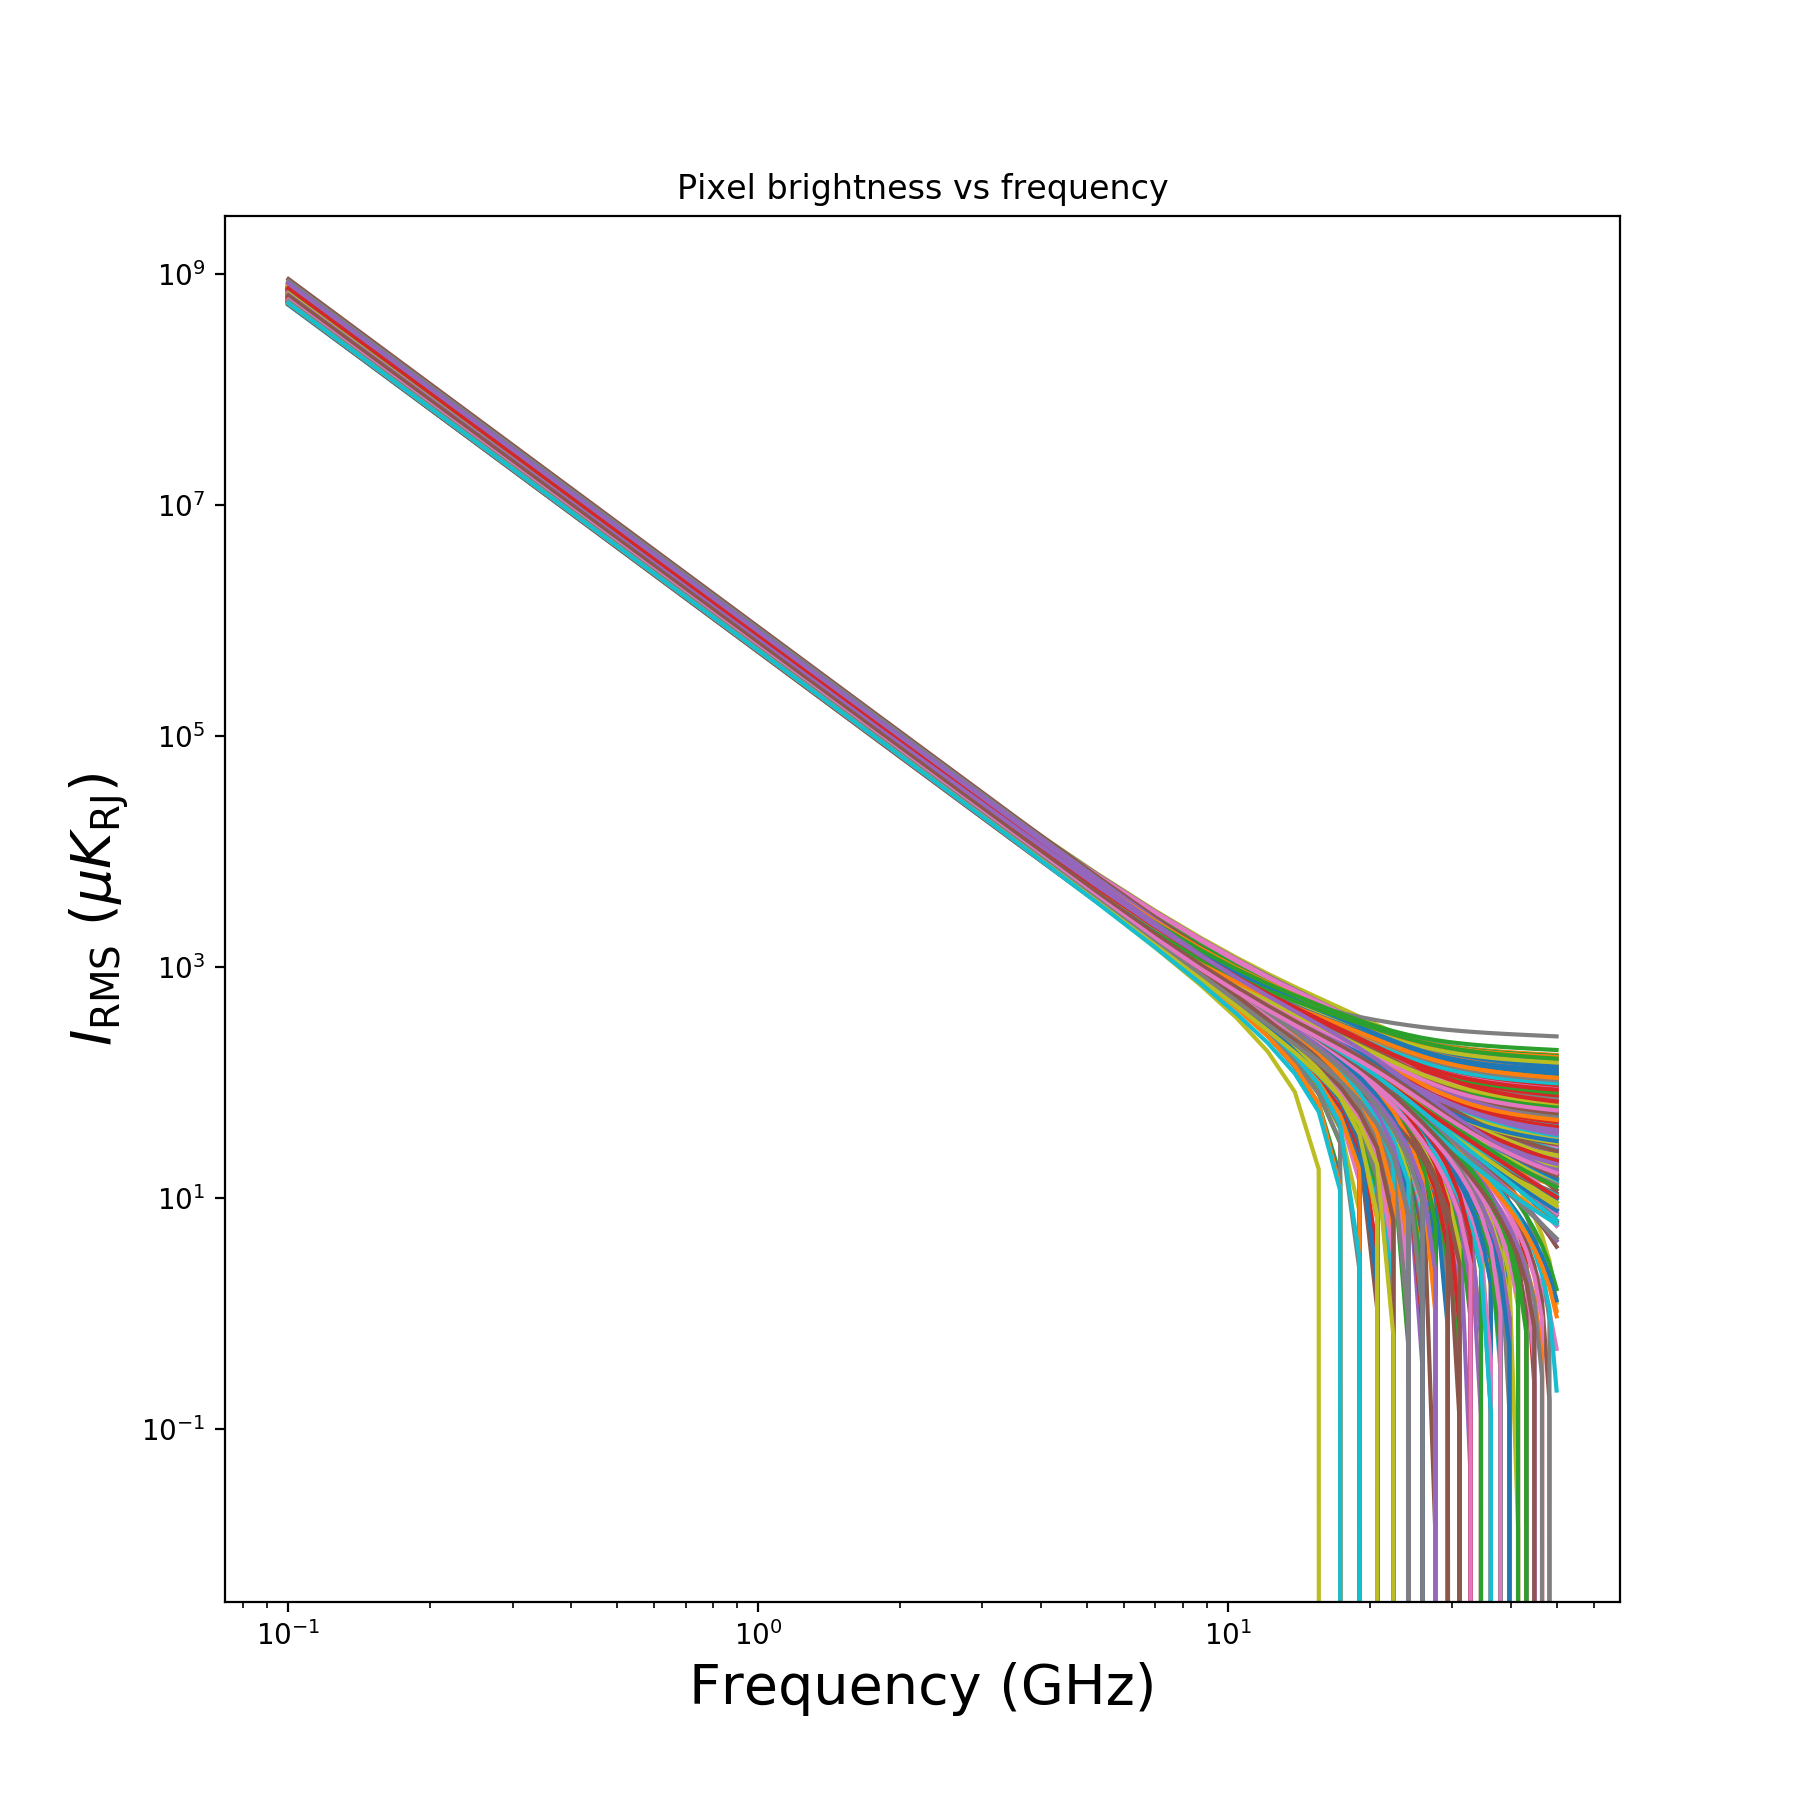

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [35]:
%matplotlib notebook

plt.figure(figsize = (9, 9))
for r in range(len(pix)):
    plt.loglog(nu, new_new_brightness[r])
    
plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)
plt.title('Pixel brightness vs frequency')

<IPython.core.display.Javascript object>


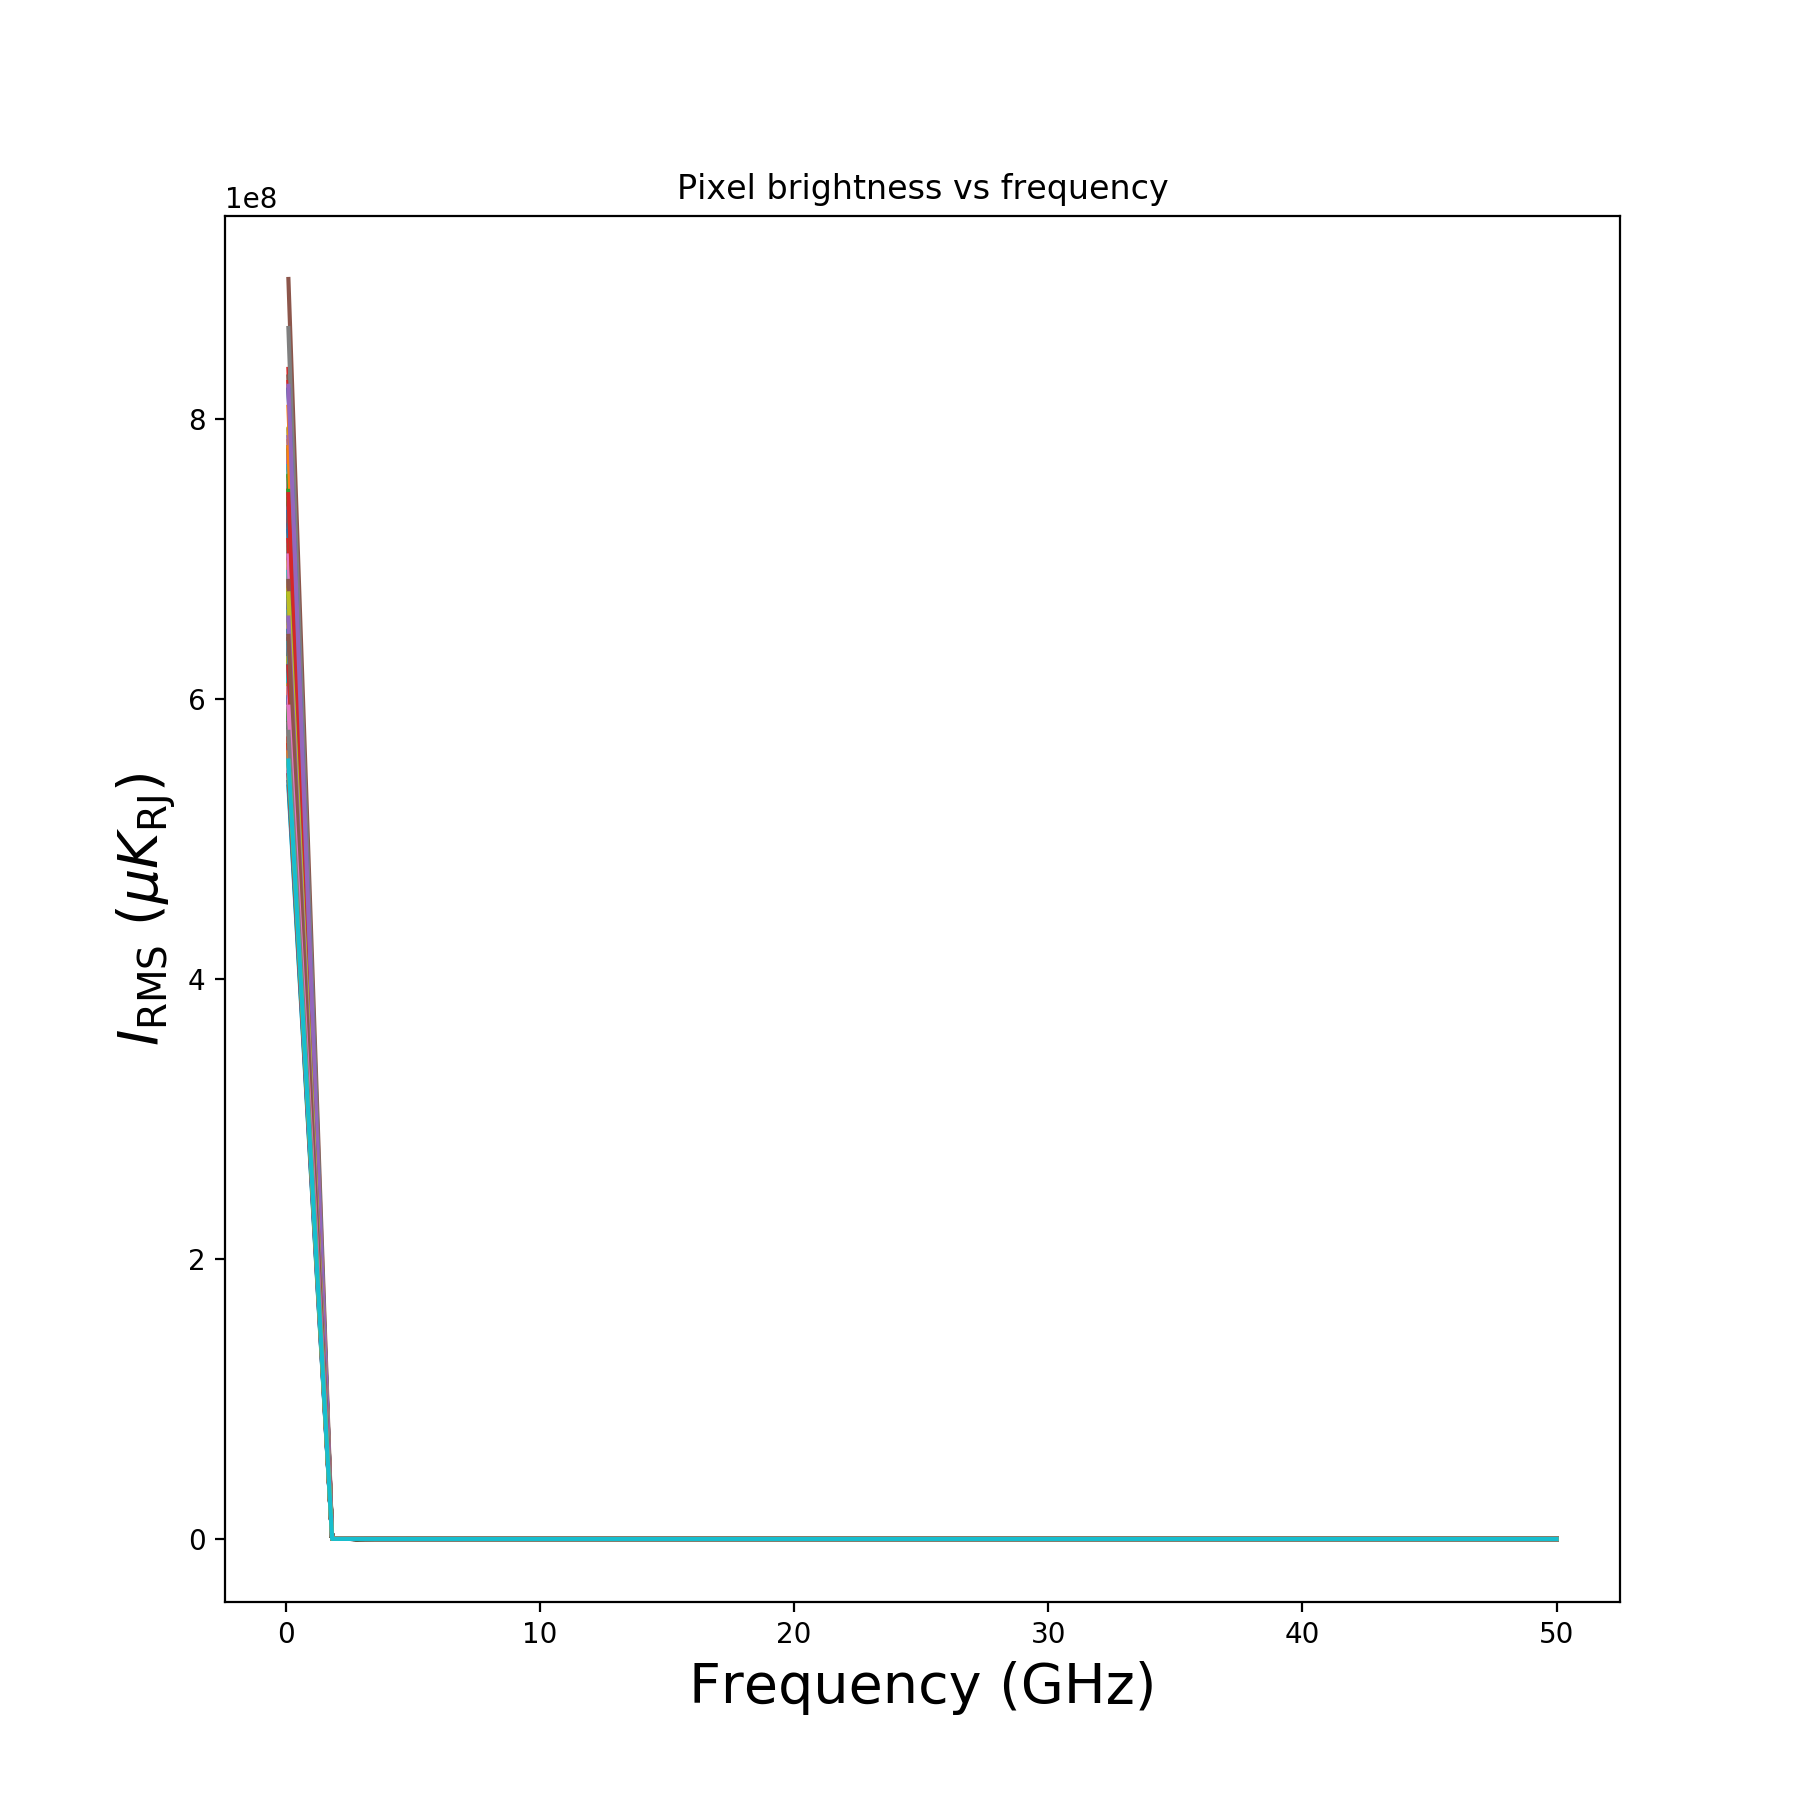

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [36]:
%matplotlib notebook

plt.figure(figsize = (9, 9))
for r in range(len(pix)):
    plt.plot(nu, new_new_brightness[r])
    
plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)
plt.title('Pixel brightness vs frequency')

In [37]:
np.savez('500pixels', new_new_brightness)